## Final Project Submission

Please fill out:
* Student name: Calvine Dasilver
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita
* Blog post URL:


 #  Demystifying House Sales Analysis with Regression Modeling in a Northwestern County

 ## Project Overview

   ## **Business Understanding**

The real estate market plays a crucial role in the economic health and stability of a region. Understanding the factors that influence house prices is essential for both buyers and sellers to navigate the market effectively. This project focuses on a specific northwestern county in the United States, aiming to shed light on the key determinants of property valuation in this area.
### Problem Statements:
What are the most significant factors influencing house prices in this northwestern county?How can we quantify the relationship between these factors and property value?Can we develop a reliable model to predict house prices based on relevant characteristics?
### Challenges:
* Real estate data can be complex and multifaceted, encompassing various property features and local market trends.
* Accurately identifying and quantifying the relative impact of each factor on house prices can be challenging.
* External factors like economic conditions and interest rates might also influence prices, requiring careful consideration.

### Proposed Solutions:
We propose utilizing multiple linear regression, a powerful machine learning technique. This method allows us to analyze a large dataset of house sales and identify the statistical relationships between various property features (e.g., square footage, number of bedrooms, location) and the corresponding sale prices.
### Objectives:
1. Develop a robust multiple linear regression model that accurately predicts house prices in the chosen northwestern county.
2. Identify the most significant factors influencing property value within this specific market.
3. Provide valuable insights into the housing market dynamics of the region, benefiting potential buyers, real estate agents, and other stakeholders.
   
 
**Research questions that would help to achieve the objectives**:

1. How does the number of bedrooms, bathrooms, grade and square footage of a house correlate with its sale price in King County?
2. How much can a homeowner expect the value of their home to increase after a specific renovation project?
3. Which renovation projects have the most significant impact on a home's market value in the northwestern county?
4. Are there specific combinations of renovation projects that provide an interdependent effect on a home's market value?

## **Data Understanding**

Our analysis leverages the King County House Sales dataset - a rich resource containing over 21,500 records and 20 distinct features(columns). Spanning house sales from May 2014 to May 2015, this dataset provides a comprehensive snapshot of the King County housing market during that period.

**The King County House Sales dataset contains the following columns;**

id - unique identified for a house

date - Date house was sold 

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.


We need to be aware of certain constraints within the data, as these might influence our analysis and interpretation of the results. From the sources;

1. The data may contain anomalies or inconsistencies that require careful examination during analysis. For instance, a record lists a house with 33 bedrooms, which appears to be an outlier

2. It's important to consider the time frame of the data (May 2014 - May 2015) as it may not fully capture the current market dynamics in King County.
3. It's important to acknowledge the scope of the data. While it provides details on house features, it may not capture external factors such as interest rates or the overall economic climate, which can also play a role in determining property values.

## **Data Preparation**

In [106]:
import csv
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [107]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [108]:
#checking what columns we have
def columns(data):
     return data.columns

columns(df)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [109]:
#checking on data data types and null values
def info(data):
     return data.info()
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [110]:
# checking the number of rows and columns
def shape(data):
     return data.shape

shape(df)


(21597, 21)

In [111]:
#checking null values
def null(data):
    return data.isna().sum()
null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [112]:
# Deleting columns with null values
def drop_columns(data,columns):
    """
    takes in a data frame and drop specified columns
    """
    return(data.drop(columns, axis = 1, inplace = True ))


In [113]:
drop_columns(df, "waterfront")
drop_columns(df, "view")
drop_columns(df, "yr_renovated")

In [114]:
# checking for non-numeric columns
def count_null(data):
    """
    Counts the aggregate sum of all null values in the data frame
    """
    return data.isnull().sum()

count_null(df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [115]:
# checking for duplicates
def count_duplicate(data):
      return data.duplicated().sum()
count_duplicate(df)

0

In [116]:
#statistical summary
def describe(data):
     return data.describe()
describe(df)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


statistical summary observation count for each column is 21596 this shows that we dont have missing values. The mean value of the house price is USD 5.402920e+05 while the minimum house price is USD 	7.800000e+04 and maximum house price is USD 7.700000e+06 The standard deviation of the house price stands at USD 3.673760e+05

In [117]:
#converting date to datetime format
df['date']=pd.to_datetime(df['date'])
#extracting year from date column
df.date=df['date'].dt.year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [118]:
# Creating a new column for sell year
df['sell_yr'] = pd.to_datetime(df['date'],format='%Y').dt.year
df.drop(columns='date', inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015


In [119]:
#creating column house age at year of sale
df['house_age']=df['sell_yr']-df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28


In [120]:
#transformation of categorical values 'condition' column
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28


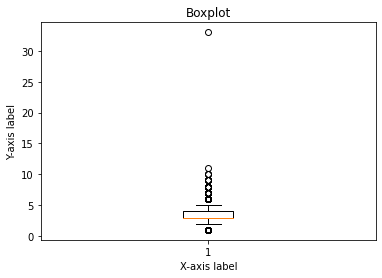

In [121]:
# checking for outliers

# Creating a boxplot
plt.boxplot(df["bedrooms"])

# Adding labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Boxplot')

# Display the plot
plt.show()


According to the above visualization, the bedroom data has an outlier of 33.So we are going to delete rows where 'bedrooms' column has value 33

In [122]:
# Delete rows where 'bedrooms' column has value 33
df = df[df['bedrooms'] != 33]

# Reset index if needed
df.reset_index(drop=True, inplace=True)

### **Exploratory Data Analysis**

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

Univariate Analysis

Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


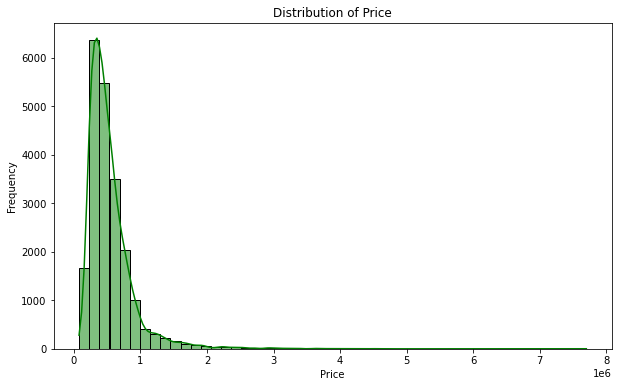

In [123]:
# Display summary statistics of the 'price' variable
price_stats = df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of house price is positively skewed suggesting that while most houses are concentrated around lower prices, there are some properties with significantly higher prices.

Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

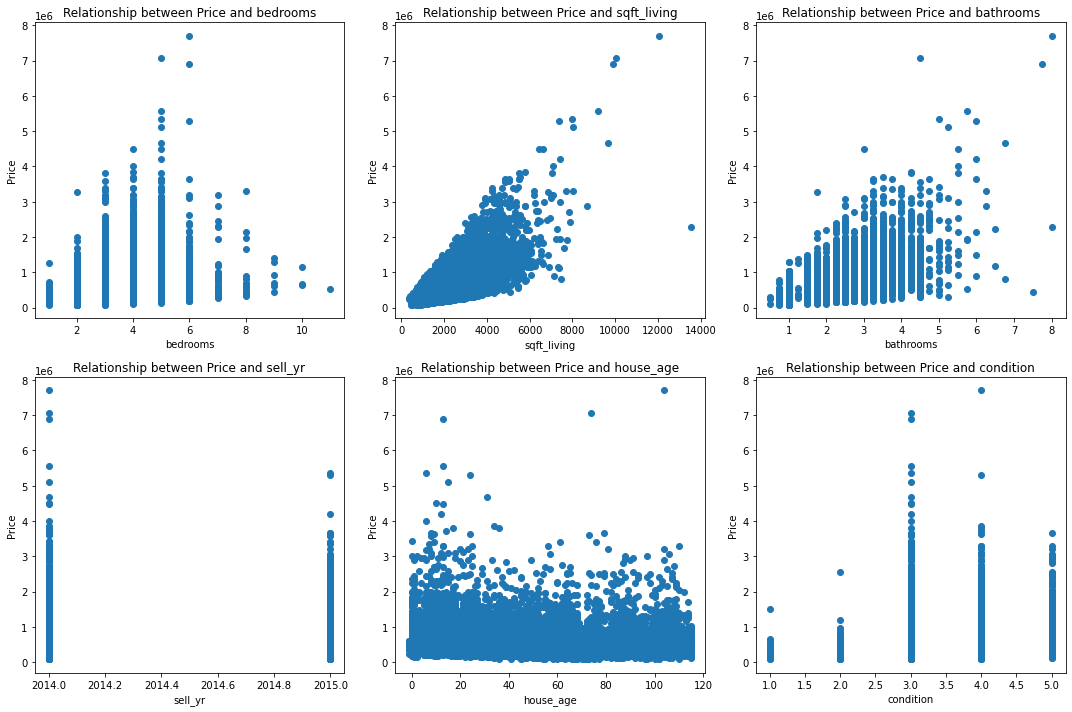

In [124]:
#relationships between our target variable and other independent variables in the dataset
import math
variables = ['bedrooms','sqft_living','bathrooms','sell_yr','house_age','condition']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[var],df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive

Multivariate Analysis

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

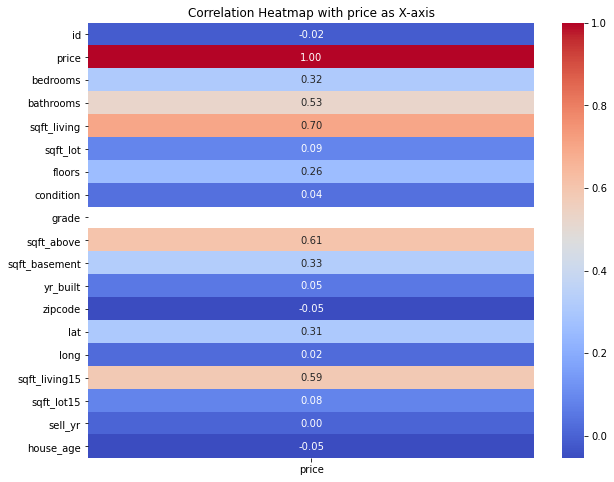

In [125]:
import numpy as np

# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
corr_matrix = df_numeric.corr()

# Select only 'sale_value' as x-axis
corr_sale_value = corr_matrix[['price']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sale_value, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap with price as X-axis')
plt.show()


Positive correlations are typically represented by shades of red, and negative correlations by shades of blue.
We note that bathrooms and sqft_living are highly positively correlated.

## **Regression Modelling** <br>
### Simple Linear Regression

when doing linear regresssion, the data to be used has to comply with LINE method;
<li>L - Linearity(Relationship between x and y should be linear)
<li>I - Independence(the observations and errors are independent of each other)
<li>N - Normality(the residuals are normarly distribute)
<li>E - Equal variance(the variance of the residuals across all level of idependent variables)

For simple linear regression we will use the one column that has the strongest correlation to the price. this will also be or baseline model for the multiple linear regression 

In [126]:
# checking for correlation
df.corr()['price'].sort_values(ascending=False).head(15)

price            1.000000
sqft_living      0.701929
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
bedrooms         0.315961
lat              0.306687
floors           0.256820
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
sell_yr          0.003736
id              -0.016763
Name: price, dtype: float64

from the correlation sqft_living has the highest correlatio with price, we will therefore use sqft_living as the exogenous variable and price as our endogenous variable

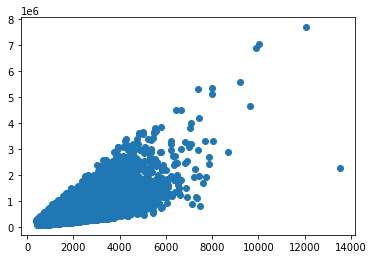

In [127]:
plt.scatter(df["sqft_living"], df["price"])

from this we can see that there is a linearity between the two variables satisfying one of the 4 LINE specifications. we will check for the others in our model summary

#### Building our model


In [128]:
# importing neccessary modules
import statsmodels.api as sm
import my_functions
# defining our independent and dependant variables 
X = df[["sqft_living"]]
y = df["price"]


#building our model
model = building_model("y ~ X", df)

# fitting the model to our data
simple_results = model.fit()
simple_results

In [129]:
# checking our model summary
print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:02:31   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.401e+04   4410.123     -9.980      0.0

##### Interprating our models results

<li> form the prob(fstatistic) we can tell that our model is statistically significant as the p_value is well below our alpha(0.05)
<li> from our R-Squared(49.3%) it shows that our model explain about 49.3% of variance in price 
<li> our intercept has a p_value less than our alpha(5%) thus it is statistically significant, from this we can say that if the square square   footage of the living room in the home is zero the price will be about -44000 USD, which doesn't really make sense but it is useful for our modeL
<li> our slope coefficient is  280.8688  showing that an increase of 1 square foot living is associated with an increase of about  280.8688 USD in price
<li>we are 95% confident that the intercept lies between -5.27e+04 and -3.54e+04
<li> we are also 95% confident that our slope is within the range 277.067 and 284.670


<li>Durbin-Watson: A test for autocorrelation in the residuals. Values between 0 and 2 suggest positive autocorrelation, between 2 and 4 suggest negative autocorrelation, and around 2 suggest no autocorrelation.<br>
this shows no autocorrelation in our errors satisfying the second condition of the LINE requirments<br>

<li> Omnibus test: shows a normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed.
<li>Jarque-Bera (JB): Another test for normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed.<br>

from the  Omnibus test and Jarque-Bera (JB) we can see that our residuals are not normally distributed which shows weakness in our model. Considering other independent variables may improve this 
 


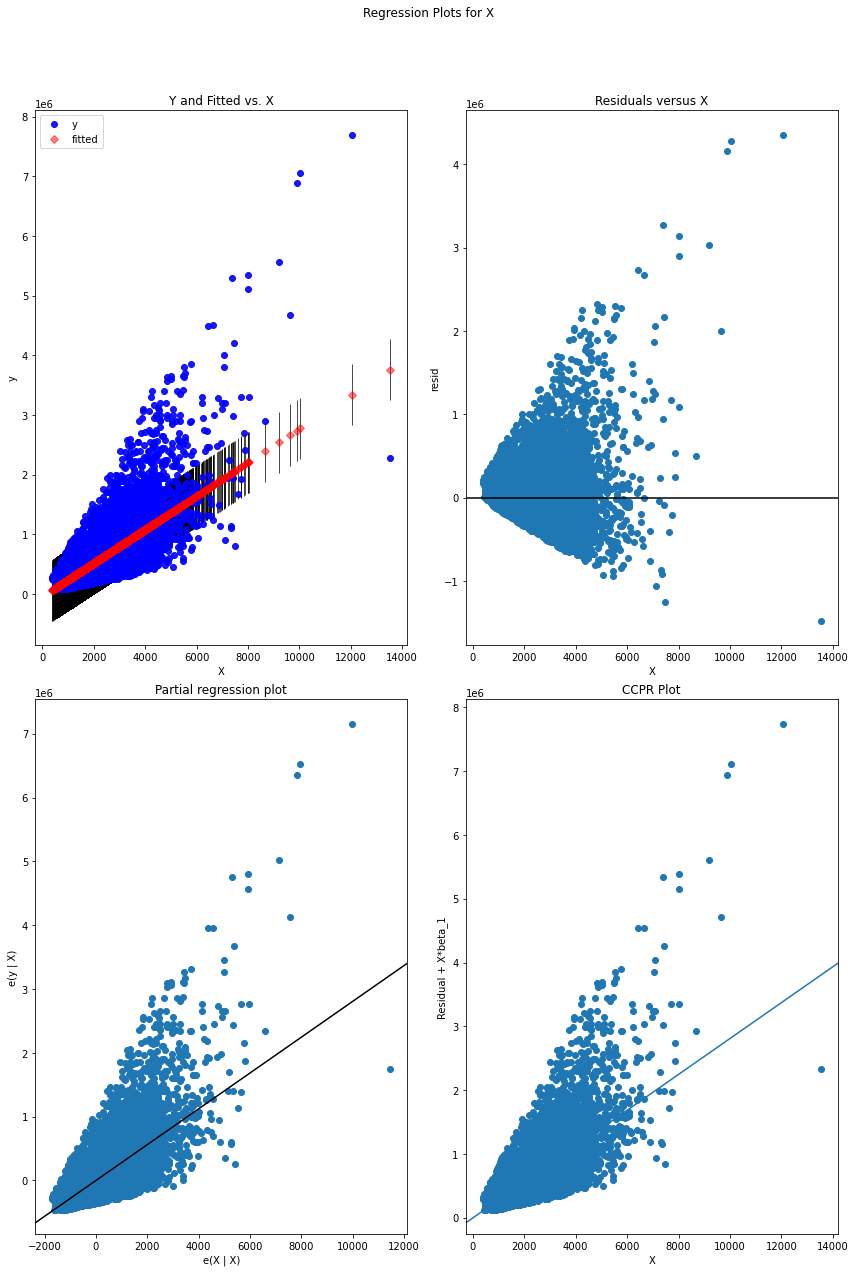

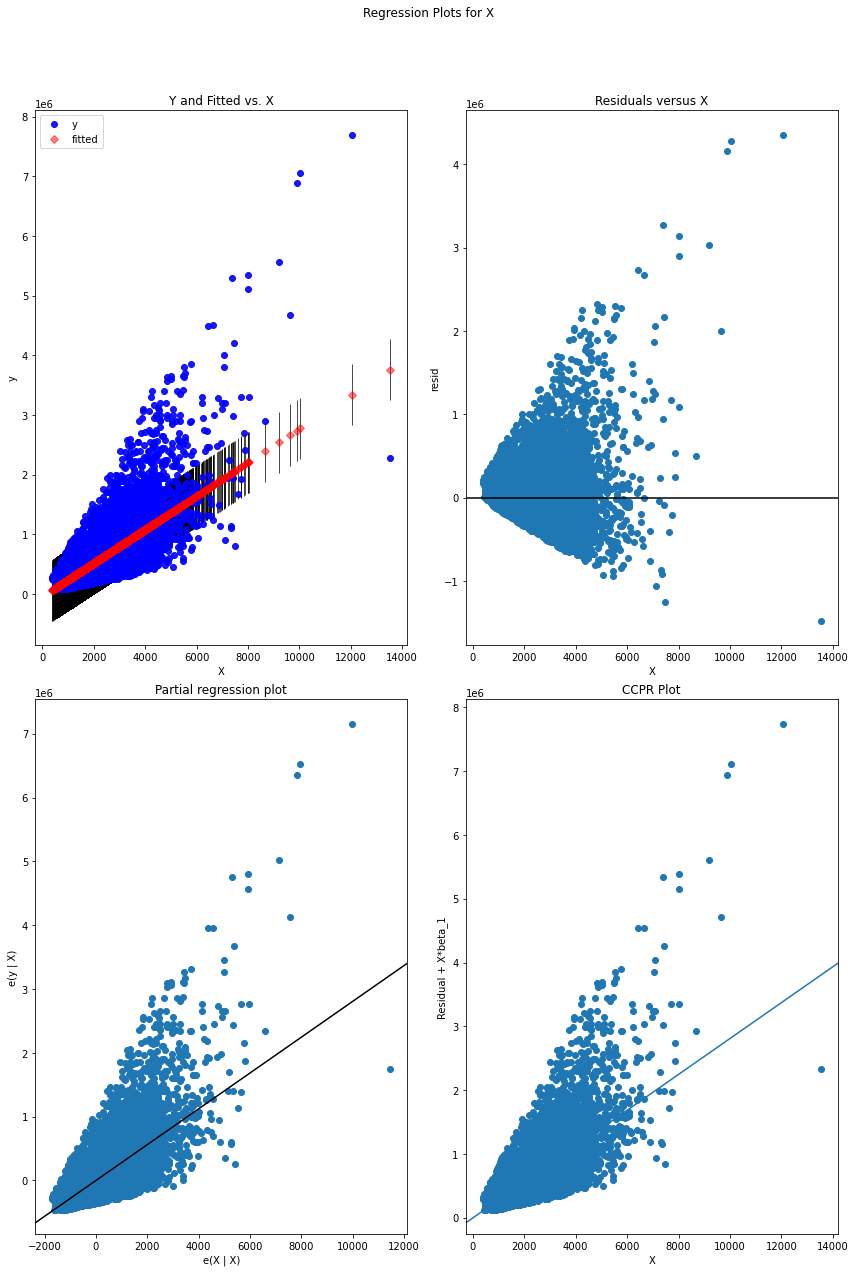

In [131]:
plotting_regression_plots(simple_results,"X")

we are plotting our residuals to understand where our model is perfoming best and where it is performing poorly

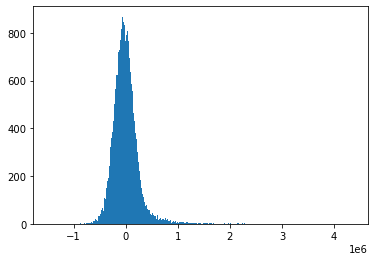

In [134]:
plt.hist(simple_results.resid, bins = "auto")
plt.show()

our graphs give us the same information as our summary did <br>
from this we can see that our residuals are not normally distributed we can solve this but using multiple linear distribution